In [ ]:
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mse(predict,target):
    return ((predict-target)**2).mean()

def mae(predict,target):
    return (abs(predict-target)).mean()

def mape(predict,target):
    return ( abs((target - predict) / target).mean()) * 100

In [ ]:
#loading covid data 
cv  = pd.read_csv('drive/My Drive/Thesis/Data/cov_data_may.csv')
cv_case = cv[['Date','New Cases']]
cv_case




,Date,New Cases
0,2021-05-01 00:00:00+00:00,4512
1,2021-05-02 00:00:00+00:00,4394
2,2021-05-03 00:00:00+00:00,4730
3,2021-05-04 00:00:00+00:00,4369
4,2021-05-05 00:00:00+00:00,5285
5,2021-05-06 00:00:00+00:00,5647
6,2021-05-07 00:00:00+00:00,6327
7,2021-05-08 00:00:00+00:00,6130
8,2021-05-09 00:00:00+00:00,3922
9,2021-05-10 00:00:00+00:00,4891


# ===========================================
Linear Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 6381667.5000
Epoch [200/1000], Loss: 5903254.0000
Epoch [300/1000], Loss: 5468217.0000
Epoch [400/1000], Loss: 5072623.0000
Epoch [500/1000], Loss: 4712897.5000
Epoch [600/1000], Loss: 4385788.0000
Epoch [700/1000], Loss: 4088336.5000
Epoch [800/1000], Loss: 3817853.7500
Epoch [900/1000], Loss: 3571895.7500
Epoch [1000/1000], Loss: 3348238.5000


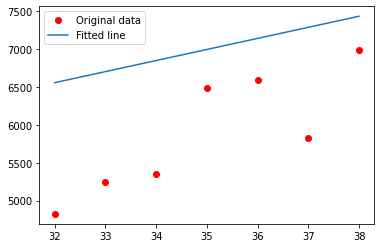

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001

# Toy dataset
cv_case['day_count'] = list(range(1,len(cv_case)+1))
ydata = [i for i in cv_case['New Cases']]
xdata = cv_case['day_count']
ydata = np.array(ydata,  dtype=np.float32)
xdata = np.array(xdata, dtype=np.float32)

x_train = xdata[:31]
y_train = ydata[:31]
x_test= xdata[31:]
y_test= ydata[31:]

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train).reshape(-1,1)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_test).reshape(-1,1)).detach().numpy()
plt.plot(x_test, y_test, 'ro', label='Original data')
plt.plot(x_test, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
predicted

array([[6556.6025],
       [6702.7974],
       [6848.9917],
       [6995.1865],
       [7141.3813],
       [7287.576 ],
       [7433.7705]], dtype=float32)

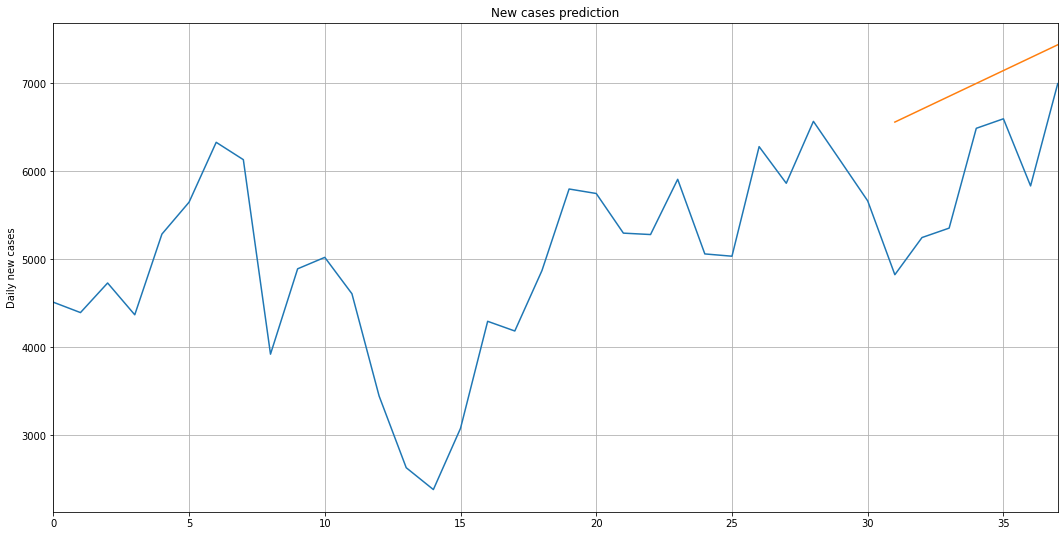

In [ ]:
#plotting prediction
model = 'linear_regression'
dr = 'drive/My Drive/Thesis/Data/images/prediction_june/'
x = np.arange(31, 38, 1)
plt.subplots(figsize=(18, 9))
plt.title('New cases prediction')
plt.ylabel('Daily new cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(cv_case['New Cases'])
plt.plot(x, predicted)
plt.savefig(dr + model + '_prediction')   
plt.show()

In [ ]:
print('MAE : ', mae( y_test, predicted))
print('MAPE : ', mape( y_test, predicted))
print('MSE : ', mse( y_test, predicted))
print('RMSE : ', rmse( y_test, predicted))

MAE :  1128.4296
MAPE :  16.01075381040573
MSE :  1835069.9
RMSE :  1354.6475


In [ ]:
print('MAE : ', mae( y_test, predicted))
print('MAPE : ', mape( y_test, predicted))
print('MSE : ', mse( y_test, predicted))
print('RMSE : ', rmse( y_test, predicted))

MAE :  1128.6628
MAPE :  16.01342111825943
MSE :  1835682.5
RMSE :  1354.8737


In [ ]:
print('MAE : ', mae( y_test, predicted))
print('MAPE : ', mape( y_test, predicted))
print('MSE : ', mse( y_test, predicted))
print('RMSE : ', rmse( y_test, predicted))

MAE :  1128.3563
MAPE :  16.009917855262756
MSE :  1834877.4
RMSE :  1354.5764


In [ ]:
print('MAE : ', mae( y_test, predicted))
print('MAPE : ', mape( y_test, predicted))
print('MSE : ', mse( y_test, predicted))
print('RMSE : ', rmse( y_test, predicted))

MAE :  1128.5049
MAPE :  16.011615097522736
MSE :  1835267.4
RMSE :  1354.7205


In [ ]:
print('MAE : ', mae( y_test, predicted))
print('MAPE : ', mape( y_test, predicted))
print('MSE : ', mse( y_test, predicted))
print('RMSE : ', rmse( y_test, predicted))

MAE :  1128.248
MAPE :  16.008681058883667
MSE :  1834593.1
RMSE :  1354.4716
